1. Generate  an  n-barbell  network  for  different  values  of  n  and  analyze  the  degree 
distribution curves. Also, find weak ties/ bridges in the network. 

In [ ]:
import networkx as nx

In [ ]:
G = nx.barbell_graph(10, 2, create_using=None)

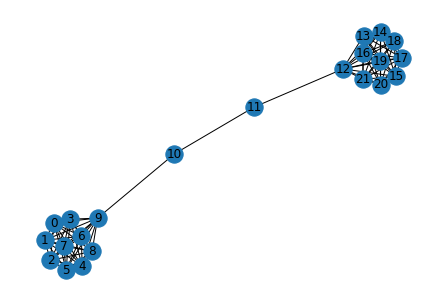

In [ ]:
nx.draw(G, with_labels = True)

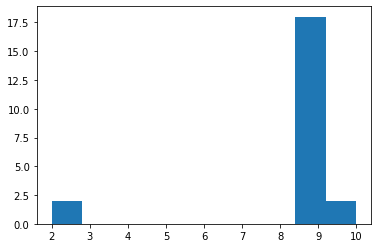

[9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 2, 2, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9]


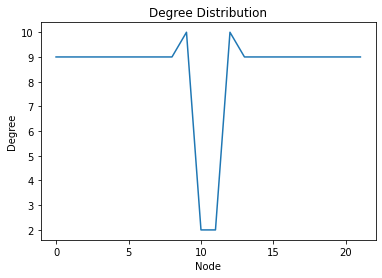

[(9, 10), (10, 11), (11, 12)]

In [ ]:
import matplotlib.pyplot as plt

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()
    print(degrees)
    plt.plot(degrees)
    plt.title("Degree Distribution")
    plt.xlabel("Node")
    plt.ylabel("Degree")
    plt.show()
plot_degree_dist(G)
list(nx.bridges(G))

2. Generate a network for Zachary’s Karate Club dataset and identify the local bridge(s) 
using  the  Neighborhood  Overlap.  Also,  find  those  edge(s)  that  could  be  the  possible 
candidate for the weak ties. 

Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


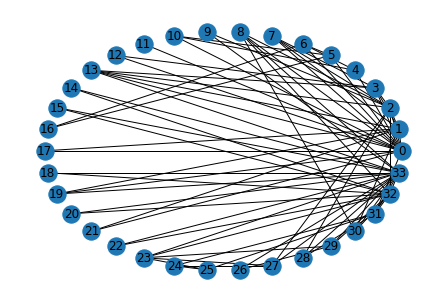

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G2 = nx.karate_club_graph()
print("Node Degree")
for v in G2:
    print(f"{v:4} {G2.degree(v):6}")

nx.draw_circular(G2, with_labels=True)
plt.show()

In [ ]:
list(nx.local_bridges(G2))

[(0, 11, inf),
 (0, 31, 3),
 (1, 30, 3),
 (2, 9, 3),
 (2, 27, 3),
 (2, 28, 3),
 (9, 33, 3),
 (13, 33, 3),
 (19, 33, 3),
 (23, 25, 3),
 (24, 27, 3)]

In [ ]:
dict = {}
def nover_lap(G2, u, v):
  common_neigh = len(set(nx.common_neighbors(G2, u, v)))
  n_join = G2.degree(u) + G2.degree(v) - common_neigh - 2;
  num = common_neigh/n_join
  edges1 = str(u)
  edges2 = str(v)
  edges = edges1 + "" + edges2
  dict[edges] = num
for u in G2.nodes():
  for v in G2.nodes():
    if u!=v and G2.has_edge(u,v):
      nover_lap(G2, u,v)
print(dict)
print("The local bridges are: ", min(dict,key = dict.get))


{'01': 0.4375, '02': 0.2631578947368421, '03': 0.3333333333333333, '04': 0.13333333333333333, '05': 0.125, '06': 0.125, '07': 0.2, '08': 0.05555555555555555, '010': 0.13333333333333333, '011': 0.0, '012': 0.06666666666666667, '013': 0.1875, '017': 0.06666666666666667, '019': 0.0625, '021': 0.06666666666666667, '031': 0.0, '10': 0.4375, '12': 0.3076923076923077, '13': 0.4444444444444444, '17': 0.375, '113': 0.3333333333333333, '117': 0.125, '119': 0.1111111111111111, '121': 0.125, '130': 0.1875, '20': 0.2631578947368421, '21': 0.3076923076923077, '23': 0.4, '27': 0.3333333333333333, '28': 0.18181818181818182, '29': 0.0, '213': 0.3, '227': 0.0, '228': 0.0, '232': 0.05263157894736842, '30': 0.3333333333333333, '31': 0.4444444444444444, '32': 0.4, '37': 0.6, '312': 0.2, '313': 0.5, '40': 0.13333333333333333, '46': 0.25, '410': 0.3333333333333333, '50': 0.125, '56': 0.5, '510': 0.25, '516': 0.3333333333333333, '60': 0.125, '64': 0.25, '65': 0.5, '616': 0.3333333333333333, '70': 0.2, '71': 0

In [ ]:
nx.local_bridges(G2, with_span=True, weight=None)

<generator object local_bridges at 0x7f0631075e50>

3. Generate  a  scale-free  network  using  a  Barabasi-Albert  model  and  find  the  edge 
betweenness centrality of each edge. To construct the scale-free network, consider the 
details given below. 

▪ The initial small network (m0) should have 3 nodes, and they will be connected.

▪ Degree of an incoming node (m) = 2 

▪ Maximum number of nodes= 5 

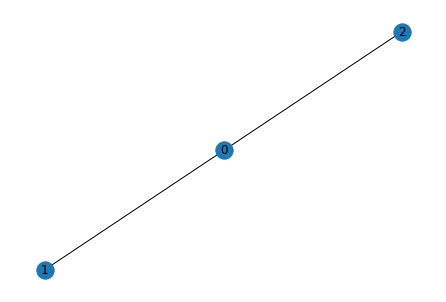

In [ ]:
G3 = nx.barabasi_albert_graph(3, 2, seed=None)
nx.draw(G3, with_labels = True)

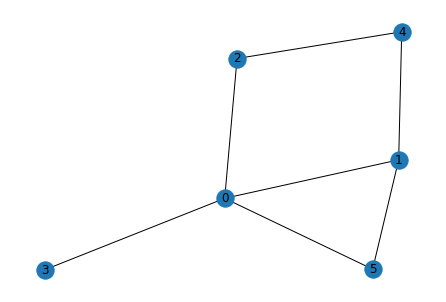

In [ ]:
import random
for i in range(3,6):
  G3.add_node(i)
  e = random.randint(0,i-1)
  f = random.randint(0,i-1)
  G3.add_edges_from([(i,e)])
  G3.add_edges_from([(i,f)])
nx.draw(G3, with_labels = True)

In [ ]:
nx.edge_betweenness_centrality(G3, k=None, normalized=True, weight=None, seed=None)

{(0, 1): 0.23333333333333334,
 (0, 2): 0.3,
 (0, 3): 0.3333333333333333,
 (0, 5): 0.2,
 (1, 4): 0.23333333333333334,
 (1, 5): 0.13333333333333333,
 (2, 4): 0.16666666666666666}

4. Generate  a  network  for  Zachary’s  Karate  Club  dataset  and  determine  the  possible 
number of communities using the Girvan-Newman algorithm. Further, create a colour 
map and use different colours for each community. Also, analyze the degree distribution 
of each community. 

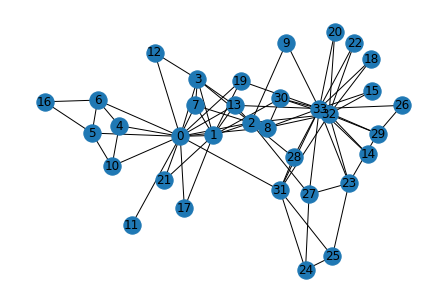

In [ ]:
G = nx.karate_club_graph()

nx.draw(G, with_labels = True)

In [ ]:
len(G.nodes), len(G.edges)

(34, 78)

In [ ]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [ ]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [ ]:
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

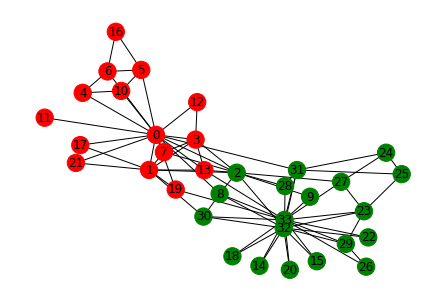

In [ ]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('red')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

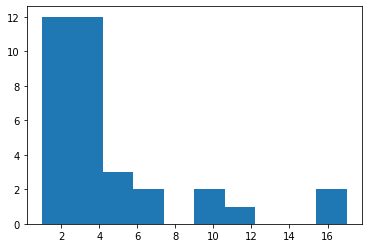

[16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]


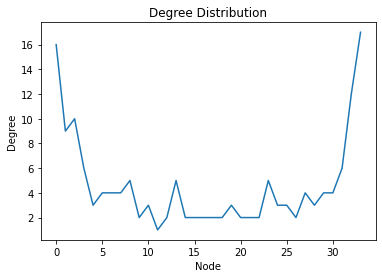

In [ ]:
plot_degree_dist(G)